In [3]:
import os
import os.path as osp

import sys
sys.path.append("..")

import core

background class: DontCare:0
0 DontCare: [0, 0, 0]
1 Car: [255, 0, 0]
2 Cyclist: [0, 255, 0]
3 Pedestrian: [0, 0, 255]
4 Misc: [255, 255, 0]
5 Person_sitting: [255, 0, 255]
6 Tram: [0, 255, 255]
7 Truck: [255, 128, 0]
8 Van: [0, 128, 255]


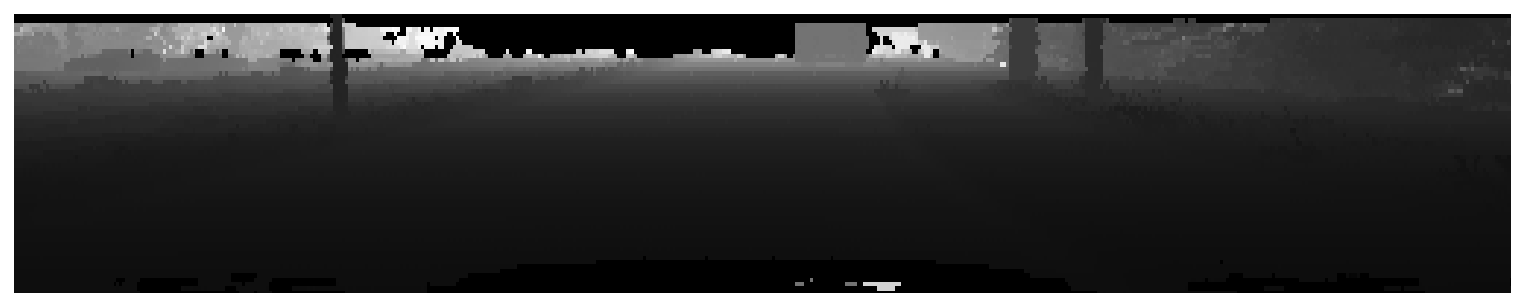

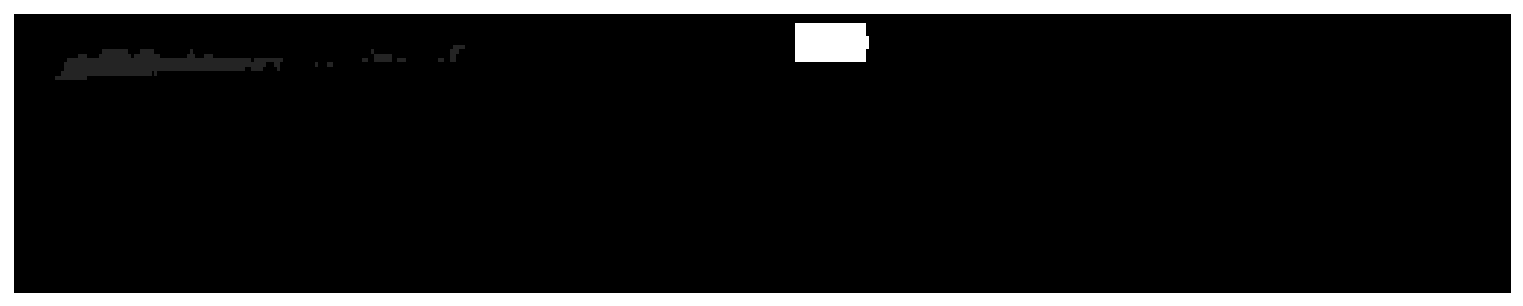

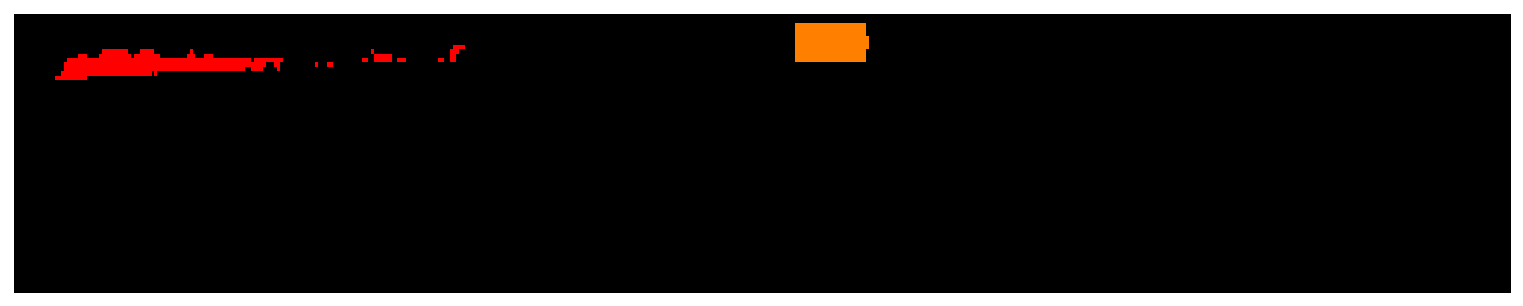

In [53]:
import sys
sys.path.append("..")

import torch
import torch.utils.data
import numpy as np

import matplotlib.pyplot as plt

import core

def visualize(fmap: np.ndarray, pallete: dict):
    img = np.zeros((*fmap.shape[:2], 3), dtype=np.uint8)
    for idx, (cls_name, color) in enumerate(pallete.items()):
        img[fmap == idx] = np.array(color)
    return img


conf_dataset = core.readconfyaml.read("../conf/data.yaml")
train_dataset = core.dataset.KITTISpherical(
    "../data", "train", conf_dataset
)
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=conf_dataset.batch_size,
    shuffle=True,
    num_workers=4
)

print(f"background class: {conf_dataset.bg_clsname}:{train_dataset.cls2ldx[conf_dataset.bg_clsname]}")

for idx, (cls_name, color) in enumerate(conf_dataset.pallete.items()):
    print(f"{idx} {cls_name}: {color}")

def show_spherical_proj(img: np.ndarray):
    plt.figure(figsize=(12, 6), dpi=128, tight_layout=True)
    plt.axis([512, 0, 0, 64])
    plt.axis("off")
    plt.imshow(img, cmap="gray", aspect=1.5, interpolation='nearest')
for iter, (fmap, gdth) in enumerate(train_loader):

    show_spherical_proj(fmap[0][3])
    show_spherical_proj(gdth[0])
    show_spherical_proj(visualize(gdth[0], conf_dataset.pallete))

    break

In [5]:
import torch
import torch.nn as nn

# 假设输入特征图的形状为 (batch_size, channels, 4, 64)
batch_size = 1  # 假设 batch_size 为 1
channels = 3    # 假设输入通道数为 3
input_height = 4
input_width = 4

# 创建输入特征图
input_tensor = torch.randn(batch_size, channels, input_height, input_width)

# 定义转置卷积层
# 输入通道数为 channels，输出通道数为 out_channels
out_channels = 1  # 输出通道数可以根据需要调整
transpose_conv = nn.ConvTranspose2d(
    in_channels=channels,
    out_channels=out_channels,
    kernel_size=4,
    stride=2,
    padding=0
)
# out = (n - 1) * stride - 2 * padding + kernel_size

# 执行转置卷积
output_tensor = transpose_conv(input_tensor)

# 输出结果的形状
print("输出特征图的形状:", output_tensor.shape)

输出特征图的形状: torch.Size([1, 1, 10, 10])


In [9]:
import torch

a = torch.randint(0, 3, (3,))
b = torch.randint(0, 3, (3,))
c = (a + b) / len(a)

print(a, b, c)

tensor([0, 0, 0]) tensor([0, 0, 2]) tensor([0.0000, 0.0000, 0.6667])


In [9]:
import os

# 示例路径
file_path = "/path/to/your/file.txt"

# 使用 os.path.splitext 获取文件名和扩展名
file_name, file_extension = os.path.splitext(os.path.basename(file_path))

# 输出结果
print("File name without extension:", file_name)
print("File extension:", file_extension)

File name without extension: file
File extension: .txt
